In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df_ROS = pd.read_csv('../../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


In [49]:
#%matplotlib tk  
%matplotlib inline

## 목표변수 검증

### Y:연속형 : 단일 변수에 대한 정규성 여부 판단
- 검증 갯수 따른 방법 선택 (레코드 갯수)
    - 5천개보다 이하 : shapiro normality test
    - 5천개보다 이상 : Anderson normality test

#### 선정 변수: 입원기간
- 분석 내용 : 입원기간이 정규 분포를 따르는가?
    - 귀무가설 : 입원기간이 정규 분포이다.
    - 대립가설 : 입원기간이 정규 분포가 아니다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.0이므로 대립가설 참 
    - 사실 결론 : 입원기간이 정규 분포가 아니다.

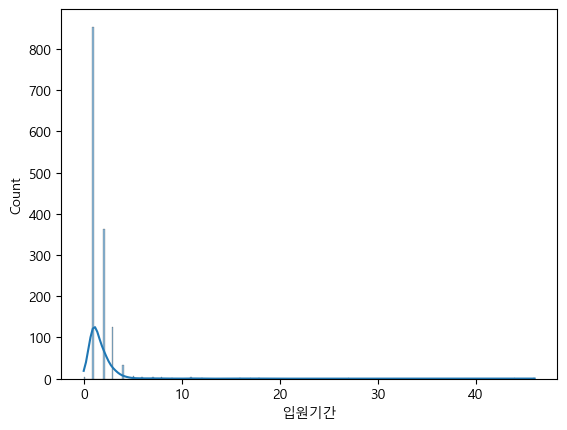

In [50]:
sns.histplot(data=df_ROS, x='입원기간', kde=True)
plt.show()

In [6]:
#df_ROS['입원기간'].isnull().sum()
df_ROS['입원기간'].count()

1405

In [7]:
stats.shapiro(df_ROS['입원기간'])

## statistic=0.2671 pvalue=0.0 -> 0.05이하로 대립가설 참 

ShapiroResult(statistic=0.26717329025268555, pvalue=0.0)

## 설명변수 검증
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'

### X:연속형 / Y:연속형 : 주로 상관관계 확인 
- correlation coefficient(상관계수)
    - -1 ~ 1  
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [8]:
df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI']].describe()

# count 
# mean : 연속형이라는 증거 

,입원기간,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,1.720285,68.250819,40.015658,168.148043,11.360370,8.368192,1987.863423,4.525979,46.519715
std,2.218973,11.275908,13.374553,9.179564,2.909581,4.796379,308.791888,4.036717,21.737232
min,0.000000,35.000000,15.000000,140.000000,1.270000,1.000000,1145.800000,2.000000,11.900000
25%,1.000000,60.000000,30.000000,161.000000,9.500000,7.060000,1777.890000,4.000000,38.600000
50%,1.000000,68.000000,39.000000,169.000000,11.200000,8.300000,1992.260000,4.000000,45.100000
75%,2.000000,75.000000,47.000000,175.000000,13.200000,9.500000,2174.800000,4.000000,51.900000
max,46.000000,136.100000,86.000000,204.000000,22.500000,101.000000,3166.140000,45.000000,559.000000


#### 선정 변수: 입원기간, 연령
- 분석 내용 : 연령에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 연령에 따라서 입원기간 변화가 없다.
    - 대립가설 : 연령에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 관계 없음  ### 확인 필요 
    - 사실 결론 : 연령에 따라서 입원기간 변화가 있다.(statistic=0.0895, pvalue=0.00078)

In [9]:
df_ROS[['입원기간','연령']].corr()

,입원기간,연령
입원기간,1.000000,0.079106
연령,0.079106,1.000000


In [10]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['연령'] )

## statistic=0.0895, pvalue=0.00078 -> 대립참, 상관계수 관계 없음 

SignificanceResult(statistic=0.08952142152561518, pvalue=0.0007813424353133282)

#### 선정 변수: 입원기간, 체중
- 분석 내용 : 체중에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 체중에 따라서 입원기간 변화가 없다.
    - 대립가설 : 체중에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계 없음 
    - 사실 결론 : 체중에 따라서 입원기간 변화가 없다.(statistic=0.97, pvalue=0.0)

In [11]:
df_ROS[['입원기간','체중']].corr()

,입원기간,체중
입원기간,1.000000,-0.047024
체중,-0.047024,1.000000


In [12]:
# 컬럼 중 하나라도 비정규 분포이면 사용
# statistic : 상관계수값 # pvalue : 현재 대립이 참 
stats.spearmanr(df_ROS['입원기간'],df_ROS['체중'] )

##  statistic=-0.003816, pvalue=0.8863 ->  statistic=-0.003816의 값으로 0에 가까움에 따라 관계 없음,  pvalue=0.8863으로 귀무가설 참 

SignificanceResult(statistic=-0.0038167036681734214, pvalue=0.8863407659962348)

#### 선정 변수: 입원기간, 신장
- 분석 내용 : 신장에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 신장에 따라서 입원기간 변화가 없다.
    - 대립가설 : 신장에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : 신장에 따라서 입원기간 변화가 없다.(statistic=-0.00381, pvalue=0.8863)

In [13]:
df_ROS[['입원기간','신장']].corr()

,입원기간,신장
입원기간,1.000000,-0.044577
신장,-0.044577,1.000000


In [14]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['체중'] )

## statistic=-0.00381, pvalue=0.8863 -> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=-0.0038167036681734214, pvalue=0.8863407659962348)

#### 선정 변수: 입원기간, 전방디스크높이
- 분석 내용 : 전방디스크높이에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 전방디스크높이에 따라서 입원기간 변화가 없다.
    - 대립가설 : 전방디스크높이에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : 전방디스크높이에 따라서 입원기간 변화가 없다.(statistic=0.0043, pvalue=0.8712 )

In [15]:
df_ROS[['입원기간','전방디스크높이(mm)']].corr()

,입원기간,전방디스크높이(mm)
입원기간,1.000000,-0.022702
전방디스크높이(mm),-0.022702,1.000000


In [16]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['전방디스크높이(mm)'] )

## statistic=0.0043, pvalue=0.8712 -> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=0.004327975487605288, pvalue=0.8712402555814732)

#### 선정 변수: 입원기간, 후방디스크높이
- 분석 내용 : 후방디스크높이에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 후방디스크높이에 따라서 입원기간 변화가 없다.
    - 대립가설 : 후방디스크높이에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : 후방디스크높이에 따라서 입원기간 변화가 없다.(statistic=-0.0518, pvalue=0.0520)
        - 전방디스크보다는 후방디스크가 입원기간에 조금더 영향을 미친다는 것은 p-value 값으로 확인함

In [17]:
df_ROS[['입원기간','후방디스크높이(mm)']].corr()

,입원기간,후방디스크높이(mm)
입원기간,1.000000,-0.019827
후방디스크높이(mm),-0.019827,1.000000


In [18]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['후방디스크높이(mm)'] )

## statistic=-0.0518, pvalue=0.0520 -> -> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=-0.051836126254760105, pvalue=0.052068464311013626)

#### 선정 변수: 입원기간, 디스크단면적
- 분석 내용 : 디스크단면적에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 디스크단면적에 따라서 입원기간 변화가 없다.
    - 대립가설 : 디스크단면적에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : 디스크단면적에 따라서 입원기간 변화가 없다.(statistic=0.03397, pvalue=0.2031)

In [19]:
df_ROS[['입원기간','디스크단면적']].corr()

,입원기간,디스크단면적
입원기간,1.000000,0.007434
디스크단면적,0.007434,1.000000


In [20]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['디스크단면적'] )

## statistic=0.03397, pvalue=0.2031-> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=0.03397532753283447, pvalue=0.20310948186613031)

#### 선정 변수: 입원기간, 디스크위치
- 분석 내용 : 디스크위치에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : 디스크위치에 따라서 입원기간 변화가 없다.
    - 대립가설 : 디스크위치에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : 디스크위치에 따라서 입원기간 변화가 없다.(statistic=-0.037, pvalue=0.156)

In [21]:
df_ROS[['입원기간','디스크위치']].corr()

,입원기간,디스크위치
입원기간,1.000000,-0.003919
디스크위치,-0.003919,1.000000


In [22]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['디스크위치'] )

## statistic=-0.037, pvalue=0.156 -> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=-0.03784333605591028, pvalue=0.15626681803248943)

#### 선정 변수: 입원기간, PI
- 분석 내용 : PI에 따라서 입원기간 변화가 있는가?
    - 귀무가설 : PI에  따라서 입원기간 변화가 없다.
    - 대립가설 : PI에 따라서 입원기간 변화가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 귀무가설 참, 상관계수 관계없음 
    - 사실 결론 : PI에 따라서 입원기간 변화가 없다.(statistic=0.0082, pvalue=0.756)

In [23]:
df_ROS[['입원기간','PI']].corr()

,입원기간,PI
입원기간,1.000000,-0.004285
PI,-0.004285,1.000000


In [24]:
stats.spearmanr(df_ROS['입원기간'],df_ROS['PI'] )

## statistic=0.0082, pvalue=0.756 -> 귀무가설 참, 상관계수 관계없음

SignificanceResult(statistic=0.008291364018018076, pvalue=0.7561680978380553)

### x : 범주형 / Y:연속형 : 범주형 따른 상관관계 확인 

#### 선정 변수: 수술기법(항목 2), 입원기간(비정규분포)- Wilcoxon Test
- 분석 내용 : 수술기법에 따라 입원기간의 평균이 차이가 있는가?
    - 귀무가설 : 입원기간 평균에 차이 없다. 
    - 대립가설 : 입원기간 평균에 차이 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=1.0, 귀무가설 참 
    - 사실 결론 : 입원기간 평균에 차이 없다.

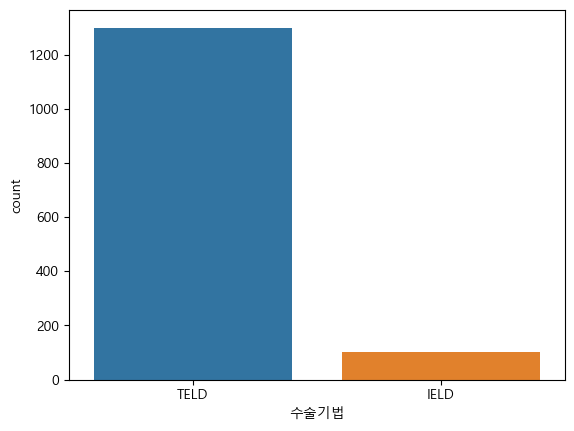

In [25]:
sns.countplot(data=df_ROS, x='수술기법')
plt.show()

In [26]:
df_ROS['수술기법'].value_counts() 

# 2집단의 범주 

TELD    1302
IELD     103
Name: 수술기법, dtype: int64

In [27]:
df_method = df_ROS[['입원기간','수술기법']]
df_method[:2]

,입원기간,수술기법
0,2,TELD
1,1,TELD


In [28]:
df_TELD = df_method[df_method['수술기법'] == 'TELD']
df_TELD[:2]

,입원기간,수술기법
0,2,TELD
1,1,TELD


In [29]:
df_IELD = df_method[df_method['수술기법'] == 'IELD']
df_TELD[:2]

,입원기간,수술기법
0,2,TELD
1,1,TELD


In [30]:
stats.ranksums(df_TELD['입원기간'], df_TELD['입원기간'])

## statistic=0.0, pvalue=1.0 -> 0.05보다 큼, 귀무가설 참 

RanksumsResult(statistic=0.0, pvalue=1.0)

## 데이터 활용 -> BMI

### 선정 변수: BMI(항목 4), 입원기간(비정규분포) - Kruskal Test
- 분석 내용 : 인사이트를 가져올수 있는가?, 분포에 차이가 있는가
    - 귀무가설 : 입원기간 대비 BMI 분포의 평균에 차이가 없다.
    - 대립가설 : 평균에 차이가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : pvalue=0.885, 귀립가설 참 
    - 사실 결론 : 입원기간 대비 BMI 분포의 평균에 차이가 없다.

In [31]:
df_ROS['체중'] = df_ROS['체중'].astype(int)
df_ROS[['신장','체중']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   신장      1405 non-null   int64
 1   체중      1405 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 16.6 KB


In [32]:
## bmi 계산식 apply 함수에 적용

def cal_BMI (row):
    weight = row['체중']
    height = row['신장'] / 100  # 키를 cm에서 m로 변환
    bmi = weight/(height * height)
    return bmi

In [33]:
df_ROS['BMI_수치값']= df_ROS.apply(cal_BMI, axis=1)
df_ROS['BMI_수치값'][:2]

0    22.582709
1    24.280975
Name: BMI_수치값, dtype: float64

In [34]:
## bmi 분류 체계 apply()

def classify_obesity(bmi):
    if bmi < 18.5:
        return '저체중'
    elif bmi < 24.9:
        return '정상체중'
    elif bmi < 29.9:
        return '과체중'
    else:
        return '비만'

In [35]:
df_ROS['BMI_결과분류'] = df_ROS['BMI_수치값'].apply(classify_obesity)
df_ROS['BMI_결과분류'][:2]

0    정상체중
1    정상체중
Name: BMI_결과분류, dtype: object

In [36]:
pd.pivot_table(data=df_ROS[['BMI_결과분류', 'BMI_수치값']], index='BMI_결과분류', aggfunc=len) # .plot(kind='bar')

,BMI_수치값
BMI_결과분류,
과체중,325
비만,52
저체중,30
정상체중,998


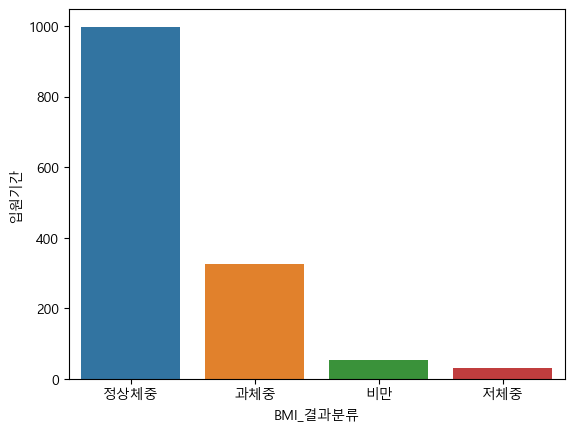

In [37]:
sns.barplot(data=df_ROS, x='BMI_결과분류', y='입원기간', estimator=len )
plt.show()

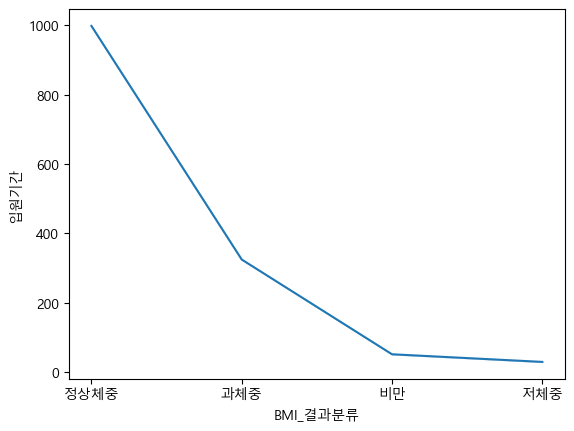

In [38]:
sns.lineplot(data=df_ROS, x='BMI_결과분류', y='입원기간', estimator=len)
plt.show()

In [39]:
df_ROS['BMI_결과분류'].value_counts()

정상체중    998
과체중     325
비만       52
저체중      30
Name: BMI_결과분류, dtype: int64

In [40]:
# 필터링, 추출 
conditions = (df_ROS['BMI_결과분류']=='정상체중') | (df_ROS['BMI_결과분류']=='과체중') |(df_ROS['BMI_결과분류']=='비만')| (df_ROS['BMI_결과분류']=='저체중')
conditions   
df_BMI_duration = df_ROS[conditions][['BMI_결과분류','입원기간']] 
df_BMI_duration[:2]

,BMI_결과분류,입원기간
0,정상체중,2
1,정상체중,1


In [41]:
df_BMI_duration.isnull().sum()

BMI_결과분류    0
입원기간        0
dtype: int64

In [42]:
bmi_list = df_BMI_duration['BMI_결과분류'].value_counts().index.to_list()
bmi_list

['정상체중', '과체중', '비만', '저체중']

In [43]:
df_result = [] 
for item in bmi_list :
    condition = (df_BMI_duration['BMI_결과분류'] == item )
    df_result.append(df_BMI_duration[condition]['입원기간']) 

In [44]:
len(df_result)

4

In [45]:
df_result[0]

0        2
1        1
2        1
3        1
4        2
        ..
1398     2
1400    12
1401     2
1402     3
1403     3
Name: 입원기간, Length: 998, dtype: int64

In [46]:
stats.kruskal(df_result[0],df_result[1],df_result[2],df_result[3])

## pvalue=0.885 -> 귀립가설 참 

KruskalResult(statistic=0.6459970883815163, pvalue=0.8858262742722958)

## 분석 결과 
- 연령은 입원기간에 영향을 미친다는 것을 확인함.
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'는 입원기간에 영향을 끼치지 않음을 확인함.
- '체중', '신장'를 토대로 BMI를 추출한 결과, BMI는 입원기간에 영향을 끼치지 않음을 확인함.
- 다만, 전방디스크높이보다 후방디스크높이가 입원기간에 영향을 미친다는 점을 알수 있었음.
